In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import colorama
from colorama import Fore, Back, Style

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)


train_dataset=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',index_col=0)
test_dataset=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col=0)

In [5]:





#Visualize the first lines of the train dataset:
print(Fore.BLUE+'FIRST ROWS OF HOUSE PRICES TRAIN DATASET:\n')
display(train_dataset.head())

#Visualize information and statistics about the train dataset:
print(Fore.BLUE+'INFO SUMMARY FOR HOUSE PRICES TRAIN DATASET: \n'+Fore.RESET)
display(train_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR HOUSE PRICES TRAIN DATASET: \n')
display(train_dataset.describe())

FIRST ROWS OF HOUSE PRICES TRAIN DATASET:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


INFO SUMMARY FOR HOUSE PRICES TRAIN DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  Overa

None

DESCRIPTIVE STATS FOR HOUSE PRICES TRAIN DATASET: 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:



#Visualize the first lines of the test dataset:
print(Fore.BLUE+'FIRST ROWS OF HOUSE PRICES TEST DATASET:\n')
display(test_dataset.head())

#Visualize information and statistics about the test dataset:
print(Fore.BLUE+'INFO SUMMARY FOR HOUSE PRICES TEST DATASET: \n'+Fore.RESET)
display(test_dataset.info())

print(Fore.BLUE+'DESCRIPTIVE STATS FOR HOUSE PRICES TEST DATASET: \n')
display(test_dataset.describe())

FIRST ROWS OF HOUSE PRICES TEST DATASET:



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


INFO SUMMARY FOR HOUSE PRICES TEST DATASET: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  Ove

None

DESCRIPTIVE STATS FOR HOUSE PRICES TEST DATASET: 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
#Group columns with similar info
train_dataset['BsmtBath'] = 0.5*train_dataset['BsmtHalfBath']+ train_dataset['BsmtFullBath']
train_dataset['Bath'] = 0.5*train_dataset['HalfBath']+ train_dataset['FullBath']                                               
train_dataset['House_Age'] = train_dataset['YrSold'] - train_dataset['YearBuilt']
train_dataset['Remod_Age'] = train_dataset['YrSold'] - train_dataset['YearRemodAdd']
train_dataset['Garage_Age'] = train_dataset['YrSold'] - train_dataset['GarageYrBlt']
to_drop=['BsmtFullBath', 'BsmtHalfBath','HalfBath','FullBath','YearBuilt', 'YrSold','GarageYrBlt','YearRemodAdd']        
train_dataset=train_dataset.drop(to_drop,axis=1)  


In [8]:
train_dataset.info(

)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [9]:
test_dataset['BsmtBath'] = 0.5*test_dataset['BsmtHalfBath']+ test_dataset['BsmtFullBath']
test_dataset['Bath'] = 0.5*test_dataset['HalfBath']+ test_dataset['FullBath']                                               
test_dataset['House_Age'] = test_dataset['YrSold'] - test_dataset['YearBuilt']
test_dataset['Remod_Age'] = test_dataset['YrSold'] - test_dataset['YearRemodAdd']
test_dataset['Garage_Age'] = test_dataset['YrSold'] - test_dataset['GarageYrBlt']
to_drop=['BsmtFullBath', 'BsmtHalfBath','HalfBath','FullBath','YearBuilt', 'YrSold','GarageYrBlt','YearRemodAdd']        
test_dataset=test_dataset.drop(to_drop,axis=1) 

In [10]:
#keep columns with 80% non_NA values
train_dataset=train_dataset.dropna(thresh=0.8* len(train_dataset),axis=1)
test_dataset=test_dataset.dropna(thresh=0.8* len(test_dataset),axis=1)

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [12]:
#Check remaining NA values:
print(Fore.BLUE+'% NA values for TRAIN DATASET: \n'+Fore.RESET,train_dataset.isna().sum()*100/len(train_dataset))
print(Fore.BLUE+'% NA values for TEST DATASET: \n'+Fore.RESET,test_dataset.isna().sum()*100/len(test_dataset))

% NA values for TRAIN DATASET: 
 MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.00

In [13]:
#Replace remaining NA values

#Select num and cat variables in train and test datasets:
train_cat = list(train_dataset.select_dtypes(include='object'))
test_cat = list(test_dataset.select_dtypes(include='object'))

train_num = list(train_dataset.select_dtypes(exclude='object'))
test_num = list(test_dataset.select_dtypes(exclude='object'))

# Replace NA values with median for numerical variables
for num in train_num:
      train_dataset[num].fillna(train_dataset[num].median(),inplace=True)
for num in test_num:
      test_dataset[num].fillna(test_dataset[num].median(),inplace=True)  
        
# Replace NA values with most frequent mode for categorical variables
for cat in train_cat:
      train_dataset[cat].fillna(train_dataset[cat].mode()[0],inplace=True)
for cat in test_cat:
      test_dataset[cat].fillna(test_dataset[cat].mode()[0],inplace=True) 

In [14]:
test_dataset.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea  

In [15]:
#split target from features:
#separate targets from variables:
y_train = train_dataset["SalePrice"]
X_train = train_dataset.drop('SalePrice', axis = 1)
train_num.remove('SalePrice')



In [16]:
for feat in train_cat:
    print(X_train[feat].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [17]:
for feat in test_cat:
    print(test_dataset[feat].value_counts())

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
AllPub    1459
Name: Utilities, dtype: int64
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
Norm      1251
Feedr       83
Artery      44
RRAn       

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=-1)

# Fit on training data and transform
X_train[train_cat] = oe.fit_transform( X_train[train_cat])






In [19]:
# transform test dataset
test_dataset[test_cat] = oe.fit_transform( test_dataset[test_cat])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns]= scaler.fit_transform(X_train[X_train.columns])





In [21]:
test_dataset[test_dataset.columns]= scaler.transform(test_dataset[test_dataset.columns])

In [22]:
train_tot=X_train.join(y_train)




In [28]:
cor=train_tot.corr()
#Correlation of numerical variables with target SalePrice:
cor_target = abs(cor["SalePrice"])
#Select least relevant features:
non_relevant_features = cor_target[cor_target<0.4]
print(non_relevant_features)

MSSubClass       0.084284
MSZoning         0.166872
LotFrontage      0.334771
LotArea          0.263843
Street           0.041036
LotShape         0.255580
LandContour      0.015453
Utilities        0.014314
LotConfig        0.067396
LandSlope        0.051152
Neighborhood     0.210851
Condition1       0.091155
Condition2       0.007513
BldgType         0.085591
HouseStyle       0.180163
OverallCond      0.077856
RoofStyle        0.222405
RoofMatl         0.132383
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType       0.018216
ExterCond        0.117303
Foundation       0.382479
BsmtCond         0.052563
BsmtExposure     0.295407
BsmtFinType1     0.092106
BsmtFinSF1       0.386420
BsmtFinType2     0.033235
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
Heating          0.098812
CentralAir       0.251328
Electrical       0.234945
2ndFlrSF         0.319334
LowQualFinSF     0.025606
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
Functional       0.115328
GarageType  

In [29]:
#Drop numerical variables having low correlation with SalePrice
train_tot=train_tot.drop(non_relevant_features.index,axis=1)
test_dataset=test_dataset.drop(non_relevant_features.index,axis=1)

In [30]:
#Separate features from target SalePrice
X_train=train_tot.drop('SalePrice',axis=1)
y_train=train_tot['SalePrice']


In [59]:
from sklearn.linear_model import RidgeCV
ridge_reg=RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

ridge_reg.fit(X_train, y_train) 

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]))

In [60]:
print(ridge_reg.alpha_)

print(ridge_reg.score(X_train,y_train))

1.0
0.8053889055695914


In [61]:
from sklearn.metrics import mean_squared_error, r2_score
ridge_pred_train=ridge_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(ridge_pred_train, y_train)))
print("Testing performance")
print ("RidgeCV score:{:.2f} ".format(r2_score(ridge_pred_train, y_train)))
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print('mse train:{:.2f}' .format(mean_squared_error(ridge_pred_train, y_train)))

Testing performance
RidgeCV score:0.75 
RMSE: 35033.86
R2: 0.75
mse train:1227371028.94


In [62]:
ridge_pred_test=ridge_reg.predict(test_dataset)
submission3 = pd.DataFrame({'Id':test_dataset.index, 'SalePrice':ridge_pred_test})
submission3.set_index('Id',inplace=True, drop=True)
submission3.to_csv('submission3.csv', index=False)

In [63]:
submission3.head()

,SalePrice
Id,
1461,104863.103486
1462,145764.859774
1463,168010.999472
1464,183733.040640
1465,204867.851957


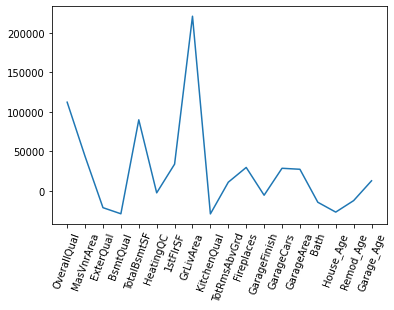

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.1)
lasso_r.fit(X_train, y_train)
coef=lasso_r.coef_
plt.plot(range(len(X_train.columns)), coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=70);

In [65]:
lasso_pred_train=lasso_r.predict(X_train)
rmse = (np.sqrt(mean_squared_error(lasso_pred_train, y_train)))
print("Testing performance")
print ("RidgeCV score:{:.2f} ".format(r2_score(lasso_pred_train, y_train)))
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print('mse train:{:.2f}' .format(mean_squared_error(lasso_pred_train, y_train)))

Testing performance
RidgeCV score:0.76 
RMSE: 34944.84
R2: 0.75
mse train:1221141905.32


In [66]:
lasso_pred_test=lasso_r.predict(test_dataset)
submission4 = pd.DataFrame({'Id':test_dataset.index, 'SalePrice':lasso_pred_test})
submission4.set_index('Id',inplace=True, drop=True)
submission4.to_csv('submission4.csv', index=False)

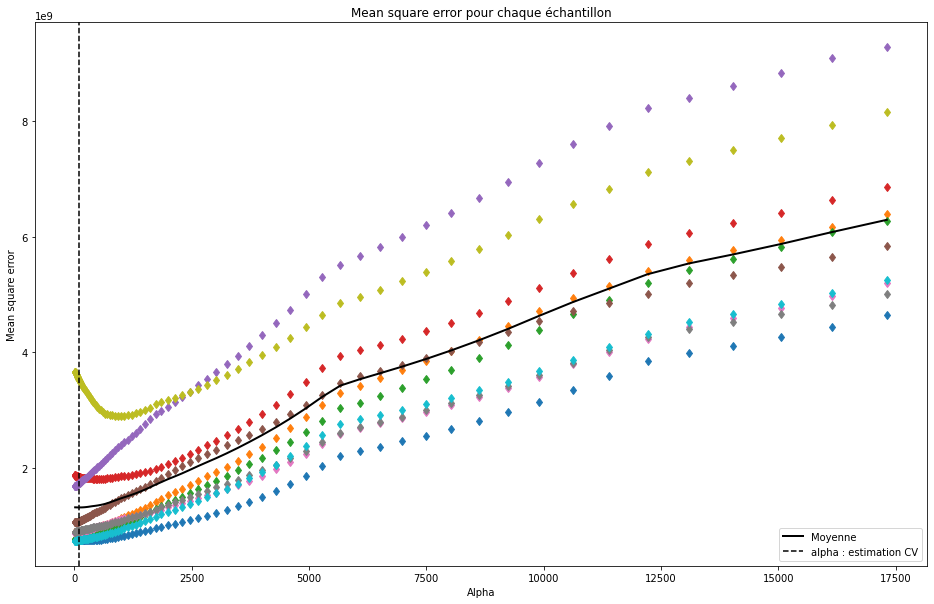

In [67]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(cv=10).fit(X_train, y_train)

#Récupérer dans alphas les différents  αα  testés par le modèle.
alphas=model_lasso.alphas_

plt.figure(figsize=(16, 10))
plt.plot(alphas, model_lasso.mse_path_, 'd')
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();



In [68]:
lassoCV_pred_train = model_lasso.predict(X_train)
    
rmse = (np.sqrt(mean_squared_error(lassoCV_pred_train, y_train)))
print("Testing performance")
print ("RidgeCV score:{:.2f} ".format(r2_score(lassoCV_pred_train, y_train)))
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print('mse train:{:.2f}' .format(mean_squared_error(lassoCV_pred_train, y_train)))


Testing performance
RidgeCV score:0.75 
RMSE: 35036.49
R2: 0.75
mse train:1227555739.46


In [70]:
lassoCV_pred_test=model_lasso.predict(test_dataset)
submission5 = pd.DataFrame({'Id':test_dataset.index, 'SalePrice':lassoCV_pred_test})
submission5.set_index('Id',inplace=True, drop=True)
submission5.to_csv('submission5.csv', index=False)

In [71]:
from sklearn.linear_model import ElasticNetCV

model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))

model_en.fit(X_train, y_train)
#model= LassoCV(cv=10).fit(X_train, y_train)

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [72]:
coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(X_train.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

,valeur estimée
intercept,102703.689497
OverallQual,101311.427481
MasVnrArea,45265.280752
ExterQual,-25313.939013
BsmtQual,-31152.080852
TotalBsmtSF,60489.026253
HeatingQC,-3309.198166
1stFlrSF,58826.216757
GrLivArea,109371.220632
KitchenQual,-31427.072690


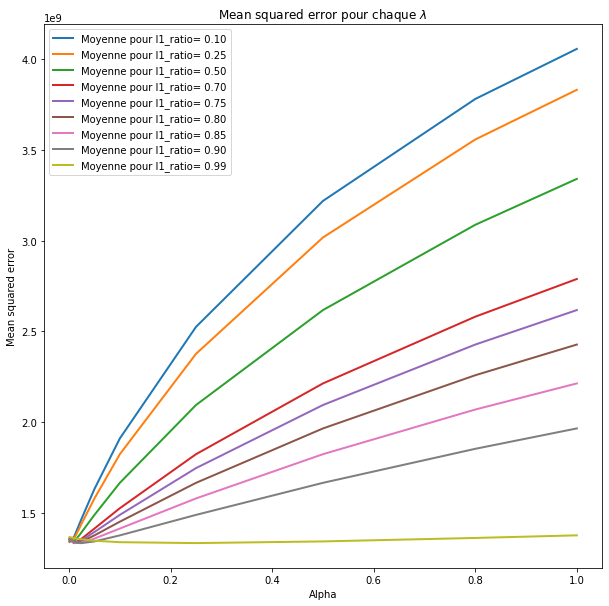

In [73]:
alphas = model_en.alphas_

plt.figure(figsize=(10, 10))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

In [76]:
en_pred_train = model_en.predict(X_train)
    
rmse = (np.sqrt(mean_squared_error(en_pred_train, y_train)))
print("Testing performance")
print ("Elastic Net score:{:.2f} ".format(r2_score(en_pred_train, y_train)))
print("RMSE: {:.2f}".format(rmse))
print('mse train:{:.2f}' .format(mean_squared_error(en_pred_train, y_train)))


Testing performance
Elastic Net score:0.74 
RMSE: 35345.43
mse train:1249299495.57


In [77]:
en_pred_test=model_en.predict(test_dataset)
submission6 = pd.DataFrame({'Id':test_dataset.index, 'SalePrice':en_pred_test})
submission6.set_index('Id',inplace=True, drop=True)
submission6.to_csv('submission6.csv', index=False)

In [78]:
submission6.head()

,SalePrice
Id,
1461,105578.064309
1462,143201.146636
1463,170094.617924
1464,186368.893706
1465,203733.191562
